In [15]:
import sys, os

path2add = os.path.normpath(os.path.abspath('..'))
print(path2add)
if not (path2add in sys.path) :
    sys.path.append(path2add)


import torch
from dataloader import GraphDataset, GraphTextDataset, TextDataset, GraphTextInMDataset
import networkx as nx

from transformers import AutoTokenizer

c:\Antoine\Study\Master 2 - MVA\ALTEGRAD\Altegrad-MVA-2023-2024


In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
tokenizer = AutoTokenizer.from_pretrained('nlpie/distil-biobert')#'microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext')

In [ ]:
import os
import shutil
from tqdm import tqdm

source_directory = r"C:\Antoine\Study\Master 2 - MVA\ALTEGRAD\Challenge\Public\Public\data"
destination_directory = r"C:\Antoine\Study\Master 2 - MVA\ALTEGRAD\Altegrad-MVA-2023-2024\data"

def move_files(source_directory, destination_directory):
    # Make sure the destination directory exists, create it if not
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    # Get the total number of files to track progress
    total_files = sum([len(files) for _, _, files in os.walk(source_directory)])

    # Initialize the tqdm progress bar
    progress_bar = tqdm(total=total_files, desc="Moving files", unit="file")

    # Walk through the source directory and its subdirectories
    for root, _, files in os.walk(source_directory):
        for file_name in files:
            source_path = os.path.join(root, file_name)
            # Create the corresponding subdirectory structure in the destination
            relative_path = os.path.relpath(source_path, source_directory)
            destination_path = os.path.join(destination_directory, relative_path)

            destination_dir = os.path.dirname(destination_path)
            if not os.path.exists(destination_dir):
                os.makedirs(destination_dir)


            # Move the file
            shutil.move(source_path, destination_path)

            # Update the progress bar
            progress_bar.update(1)

    # Close the progress bar
    progress_bar.close()

In [ ]:
# move_files(source_directory, destination_directory)

In [18]:
train_dir = r"data/processed_nlpie/train/"
test_dir = r"data/processed_nlpie/test/"

In [ ]:
sample = torch.load(train_dir + "data.pt")

In [22]:
def load_datasets(tokenizer: AutoTokenizer):
    gt = np.load("../data/token_embedding_dict.npy", allow_pickle=True)[()]
    val_dataset = GraphTextInMDataset(
        root="../data/", gt=gt, split="val", tokenizer=tokenizer, model_name='nlpie/distil-biobert'
    )
    train_dataset = GraphTextInMDataset(
        root="../data/", gt=gt, split="train", tokenizer=tokenizer, model_name='nlpie/distil-biobert'
    )
    return val_dataset, train_dataset

val_dataset, train_dataset = load_datasets(tokenizer)

In [23]:
sample = train_dataset[120]

In [24]:
import textwrap

In [30]:
def show_sample(sample):
    edges = sample.edge_index
    G = nx.DiGraph()

    # Add edges to the graph
    for i in range(len(edges[0])):
        G.add_edge(int(edges[0][i]), int(edges[1][i]))

    # Draw the graph
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, with_labels=True, font_size=8, node_color='skyblue', node_size=200, edge_color='gray', linewidths=0.3, arrows=False)

    # Show the plot
    decoded_input = tokenizer.batch_decode(sample.input_ids, skip_special_tokens=True)[0]
    wrapped_text = textwrap.fill(decoded_input, width=70)

    print(sample.edge_index)

    plt.text(0, -1, wrapped_text, ha='center', va='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.4))

tensor([[ 0,  1,  1,  2,  1,  3,  3,  4,  4,  5,  5,  6,  6,  7,  6,  8,  5,  9,
          9, 10, 10, 11, 11, 12, 11, 13, 10, 14, 14,  3],
        [ 1,  0,  2,  1,  3,  1,  4,  3,  5,  4,  6,  5,  7,  6,  8,  6,  9,  5,
         10,  9, 11, 10, 12, 11, 13, 11, 14, 10,  3, 14]])
tensor([[ 0,  1,  1,  2,  1,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
          9, 10, 10, 11, 11, 12, 11, 13],
        [ 1,  0,  2,  1,  3,  1,  4,  3,  5,  4,  6,  5,  7,  6,  8,  7,  9,  8,
         10,  9, 11, 10, 12, 11, 13, 11]])
tensor([[ 0,  1,  1,  2,  1,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
          9, 10,  9, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18,
         18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 23, 25],
        [ 1,  0,  2,  1,  3,  1,  4,  3,  5,  4,  6,  5,  7,  6,  8,  7,  9,  8,
         10,  9, 11,  9, 12, 11, 13, 12, 14, 13, 15, 14, 16, 15, 17, 16, 18, 17,
         19, 18, 20, 19, 21, 20, 22, 21, 23, 22, 24, 23, 25, 23]])
tensor([[ 0,  1, 

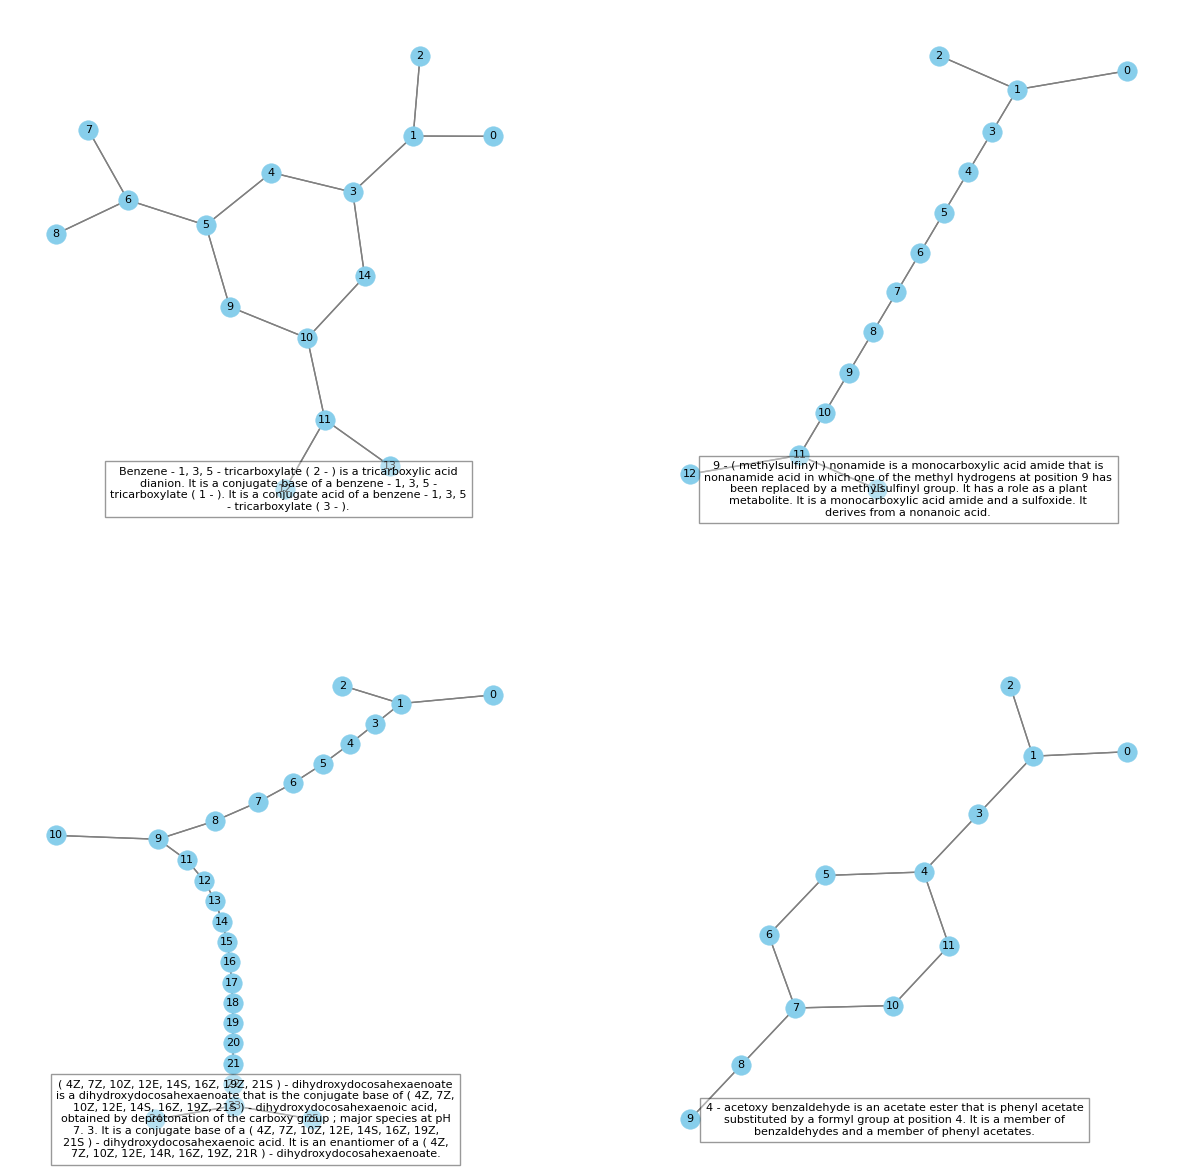

In [34]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
show_sample(train_dataset[452])
plt.subplot(2, 2, 2)
show_sample(train_dataset[785])
plt.subplot(2, 2, 3)
show_sample(train_dataset[4542])
plt.subplot(2, 2, 4)
show_sample(train_dataset[4277])

In [1]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext')

No sentence-transformers model found with name C:\Users\Antoine/.cache\torch\sentence_transformers\microsoft_BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext. Creating a new one with MEAN pooling.


In [ ]:
decoded_input = tokenizer.batch_decode(train_dataset[41].input_ids, skip_special_tokens=True)[0]
print(decoded_input)
embedding = model.encode(
    decoded_input
)
print(embedding.shape)

In [4]:
import pandas as pd

In [13]:
train_ds = pd.read_csv("./data/train.tsv", sep="\t")
val_ds = pd.read_csv("./data/val.tsv", sep="\t")

# Read data/test_text.txt into a list of strings
with open("./data/test_text.txt", "r") as f:
    test_text = f.readlines()

test_text = [text.strip() for text in test_text]

In [14]:
ds = train_ds.iloc[:, 1].tolist() + val_ds.iloc[:, 1].tolist() + test_text

In [2]:
# Save to pandas dataframe
df = pd.DataFrame(ds, columns=["text"])
df.to_csv("./data/text.csv", index=False)

NameError: name 'pd' is not defined

In [10]:
# Truncate the text to 512 tokens and add overflow to new rows
df = pd.read_csv("./data/text.csv")

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext')

def preprocess(samples):
    batch_size = 64

    tokenized = []
    for i in range(0, len(samples), batch_size):
        tokenized.append(tokenizer(samples["text"][i:i+batch_size].tolist(), truncation=True, max_length=256, return_overflowing_tokens=True))
    return tokenized

tokenized = preprocess(df)

In [18]:
df = pd.DataFrame(columns=["text", "input_ids", "attention_mask"])
for i in range(len(tokenized)):
    # df = df.append(pd.DataFrame({
    #     "text": tokenized[i]["input_ids"],
    #     "input_ids": tokenized[i]["input_ids"],
    #     "attention_mask": tokenized[i]["attention_mask"],
    # }))
    # Change append to concat
    df = pd.concat([df, pd.DataFrame({
        "text": tokenized[i]["input_ids"],
        "input_ids": tokenized[i]["input_ids"],
        "attention_mask": tokenized[i]["attention_mask"],
    })])
df

,text,input_ids,attention_mask
0,"[2, 22, 17, 4118, 25238, 1037, 17, 22, 17, 163...","[2, 22, 17, 4118, 25238, 1037, 17, 22, 17, 163...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,"[2, 19406, 1935, 2687, 1977, 1925, 4595, 16, 1...","[2, 19406, 1935, 2687, 1977, 1925, 4595, 16, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"[2, 2136, 17, 2127, 17, 24, 17, 18588, 28038, ...","[2, 2136, 17, 2127, 17, 24, 17, 18588, 28038, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"[2, 7843, 22, 17, 20990, 2928, 9286, 2010, 197...","[2, 7843, 22, 17, 20990, 2928, 9286, 2010, 197...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,"[2, 10534, 5405, 2053, 12, 21, 15, 13, 1977, 1...","[2, 10534, 5405, 2053, 12, 21, 15, 13, 1977, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...
43,"[2, 12, 17659, 13, 17, 24321, 11800, 11123, 19...","[2, 12, 17659, 13, 17, 24321, 11800, 11123, 19...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
44,"[2, 12, 24, 17, 20990, 22467, 2199, 13, 29141,...","[2, 12, 24, 17, 20990, 22467, 2199, 13, 29141,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
45,"[2, 8298, 4151, 2057, 1977, 43, 3421, 5482, 19...","[2, 8298, 4151, 2057, 1977, 43, 3421, 5482, 19...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
46,"[2, 54, 17, 13489, 5482, 12, 21, 15, 13, 1977,...","[2, 54, 17, 13489, 5482, 12, 21, 15, 13, 1977,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [16]:
df.to_csv("./data/text_tokenized.csv", index=False)

,text,input_ids,attention_mask
0,"[2, 22, 17, 4118, 25238, 1037, 17, 22, 17, 163...","[2, 22, 17, 4118, 25238, 1037, 17, 22, 17, 163...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,"[2, 19406, 1935, 2687, 1977, 1925, 4595, 16, 1...","[2, 19406, 1935, 2687, 1977, 1925, 4595, 16, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"[2, 2136, 17, 2127, 17, 24, 17, 18588, 28038, ...","[2, 2136, 17, 2127, 17, 24, 17, 18588, 28038, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"[2, 7843, 22, 17, 20990, 2928, 9286, 2010, 197...","[2, 7843, 22, 17, 20990, 2928, 9286, 2010, 197...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,"[2, 10534, 5405, 2053, 12, 21, 15, 13, 1977, 1...","[2, 10534, 5405, 2053, 12, 21, 15, 13, 1977, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...
43,"[2, 12, 17659, 13, 17, 24321, 11800, 11123, 19...","[2, 12, 17659, 13, 17, 24321, 11800, 11123, 19...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
44,"[2, 12, 24, 17, 20990, 22467, 2199, 13, 29141,...","[2, 12, 24, 17, 20990, 22467, 2199, 13, 29141,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
45,"[2, 8298, 4151, 2057, 1977, 43, 3421, 5482, 19...","[2, 8298, 4151, 2057, 1977, 43, 3421, 5482, 19...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
46,"[2, 54, 17, 13489, 5482, 12, 21, 15, 13, 1977,...","[2, 54, 17, 13489, 5482, 12, 21, 15, 13, 1977,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [21]:
import pandas as pd
import re

In [3]:
train_ds = pd.read_csv("../data/train.tsv", sep="\t")

In [6]:
texts = train_ds.iloc[:, 1].tolist()

In [22]:
split_texts = []
for i in range(len(texts)):
    # Split for '. ' followed by a capital letter
    split_texts.append(re.split(r'\. (?=[A-Z])', texts[i]))


In [24]:
lengths = [len(split_texts[i]) for i in range(len(split_texts))]
# Counter for the lengths
from collections import Counter
Counter(lengths)

Counter({3: 9851,
         4: 6448,
         2: 6607,
         5: 2288,
         1: 707,
         6: 423,
         7: 72,
         8: 8,
         9: 3})

In [28]:
# Print the texts with the length equal to 6
for i in range(len(split_texts)):
    if len(split_texts[i]) == 7:
        print(texts[i], "\n")
        spt = split_texts[i]
        for s in spt:
            print(s)
        print()

Paromomycin is an amino cyclitol glycoside that is the 1-O-(2-amino-2-deoxy-alpha-D-glucopyranoside) and the 3-O-(2,6-diamino-2,6-dideoxy-beta-L-idopyranosyl)-beta-D-ribofuranoside of 4,6-diamino-2,3-dihydroxycyclohexane (the 1R,2R,3S,4R,6S diastereoisomer). It is obtained from various Streptomyces species. A broad-spectrum antibiotic, it is used (generally as the sulfate salt) for the treatment of acute and chronic intestinal protozoal infections, but is not effective for extraintestinal protozoal infections. It is also used as a therapeutic against visceral leishmaniasis. It has a role as an antibacterial drug, an antiprotozoal drug, an anthelminthic drug and an antiparasitic agent. It is an aminoglycoside antibiotic and an amino cyclitol glycoside. It derives from a streptamine. 

Paromomycin is an amino cyclitol glycoside that is the 1-O-(2-amino-2-deoxy-alpha-D-glucopyranoside) and the 3-O-(2,6-diamino-2,6-dideoxy-beta-L-idopyranosyl)-beta-D-ribofuranoside of 4,6-diamino-2,3-dihyd

In [25]:
for spt in split_texts[500:550]:
    # print(len(spt))
    for s in spt:
        print(s)
    print()

Phenyl salicylate is a benzoate ester that is the phenyl ester of salicylic acid
Also known as salol, it can be formed by heating salicylic acid with phenol and is used in the manufacture of some polymers, lacquers, adhesives, waxes and polishes
It has a role as an ultraviolet filter
It is a benzoate ester, a member of phenols and a member of salicylates
It derives from a salicylic acid.

BMS-754807 is a pyrrolotriazine that is pyrrolo[2,1-f][1,2,4]triazine which is substituted at position 2 by the pyrrolidine nitrogen of (2S)-N-(6-fluoropyridin-3-yl)-2-methylprolinamide, and at position 4 by a (5-cyclopropyl-1H-pyrazol-3-yl)amino group
It is a potent, reversible inhibitor of the insulin-like growth factor 1 receptor/insulin receptor family kinases
It has a role as an EC 2.7.10.1 (receptor protein-tyrosine kinase) inhibitor and an antineoplastic agent
It is a pyrrolotriazine, a member of pyrazoles, a member of pyridines and a member of pyrrolidines.

Robinin is a glycosyloxyflavone tha

In [31]:
def balance_sentences(sentences):
    total_words = sum(len(sentence.split()) for sentence in sentences)
    midpoint = total_words // 2

    accumulated_words = 0
    first_part = []

    for sentence in sentences:
        accumulated_words += len(sentence.split())
        first_part.append(sentence)
        if accumulated_words >= midpoint:
            break

    second_part = sentences[len(first_part):]

    return '. '.join(first_part), '. '.join(second_part)

In [36]:
for i in range(len(split_texts)):
    if len(split_texts[i]) == 7:
        bl = balance_sentences(split_texts[i])
        for s in bl:
            print(s)
        print()

Paromomycin is an amino cyclitol glycoside that is the 1-O-(2-amino-2-deoxy-alpha-D-glucopyranoside) and the 3-O-(2,6-diamino-2,6-dideoxy-beta-L-idopyranosyl)-beta-D-ribofuranoside of 4,6-diamino-2,3-dihydroxycyclohexane (the 1R,2R,3S,4R,6S diastereoisomer). It is obtained from various Streptomyces species. A broad-spectrum antibiotic, it is used (generally as the sulfate salt) for the treatment of acute and chronic intestinal protozoal infections, but is not effective for extraintestinal protozoal infections
It is also used as a therapeutic against visceral leishmaniasis. It has a role as an antibacterial drug, an antiprotozoal drug, an anthelminthic drug and an antiparasitic agent. It is an aminoglycoside antibiotic and an amino cyclitol glycoside. It derives from a streptamine.

3-bromopyruvic acid is a 2-oxo monocarboxylic acid that is pyruvic acid in which one of the methyl hydrogens is replaced by bromine. Synthetic brominated derivative and structural analog of pyruvic acid. Hig